DOTA 2 Data Analysis
===========
* * *

## Introduction ##

> ** Dota 2 ** is a multiplayer online battle arena (MOBA) video game on Steam that is famous all over the world. It is played in matches between two teams of five players, with each team occupying and defending their own separate base on the map. Each of the ten players independently controls a powerful character, known as a "hero", who all have unique abilities and differing styles of play. During a match, players collect experience points and items for their heroes to successfully battle the opposing team's heroes in player versus player combat. A team wins by being the first to destroy a large structure located in the opposing team's base, called "The Ancient". (From Wikipedia)

![Failed to load pic](http://assets1.ignimgs.com/2017/05/05/dota-2-1280-1493953406643_480w.jpg "Dota 2")

As a big fan of Dota, I'm always asking myself this question after losing a match

### Why I cannot win this game? ###

- Did I select the wrong hero?

- Did I die for too many times?

- Would it be better if I choose another item?

One idea came to my mind : maybe it's time to do some research on the Dota 2 data !

** If you: **

- have the same trouble, struggling in finding ways to improve your Dota 2 skills 

- are fresh in this game, wanting to quickily get more information

- have no interest in Dota, just curious about why so many people addicted to this game:

** This tutorial is created for you ! **

### Tutorial content ###

In this tutorial, we will cover three topics regarding ** Dota 2 data analysis: **

- [Obtaining Dota 2 data](#Obtaining-Dota-2-data)

- [Understanding Dota 2 data](#Understanding-Dota-2-data)

- [Analysing Dota 2 data](#Analysing-Dota-2-data)

> Talk is cheap, let's go to the code

* * *

## Part 1: Obtaining Dota 2 data 

There are millions of Dota2 matches happening every day. How can we get the data of these matches? There are multiple ways we can do that.
### Method 1: dota2api ###
Actually, Valve (The company who created Dota 2) has already opened all the Dota 2 data resources to us. If you want to access this data, you can directly use dota2api.

To use [dota2api](https://dota2api.readthedocs.io/en/latest/tutorial.html#), first you need to apply for a Steam Web API key at this [link](https://steamcommunity.com/dev/apikey). If you do not have a Steam account, you can apply for that at this [link](https://store.steampowered.com/join/) first.

Next step is to install dota2api by:
<pre><code>pip install dota2api</code></pre>

You can choose to set the API key as environment variable in Linux:
<pre><code>$ export D2_API_KEY=83247983248793298732</code></pre>
and initialize the module:
<pre><code>api = dota2api.Initialise()</code></pre>

Or you can direcly initialise the module:
<pre><code>api = dota2api.Initialise("{api_key}", raw_mode=True)</code></pre>

Finally, you can get the match data:
<pre><code>match = api.get_match_details(match_id={match_id})</code></pre>

In this way, the data of match with the {match_id} will be in json format.

Let's take one recent game - 

** Evil Geniuses(Radiant) ** Vs ** VGJ Thunder(Dire) **

at Dota 2 Asia Championship 2018 for an example.

I got the match_id <font color =green> 3805240127 </font> from https://www.dotabuff.com/matches.

First, I stored my api-key in a file 'api_key.txt' and read this file before initializing the api. Then I can call the dota2api as I mentioned above.

In [1]:
import dota2api

In [2]:
def read_api_key(filepath):
    with open(filepath, 'r') as f:
        return f.read().replace('\n','')
    
api = dota2api.Initialise(read_api_key('api_key.txt'), raw_mode=True)

# the type return by api.get_match_details(match_id=3805240127) would be dota2dict, we can simple convert it into dict
match_data = dict(api.get_match_details(match_id=3805240127))

In [3]:
match_data.keys()

dict_keys(['players', 'radiant_win', 'duration', 'pre_game_duration', 'start_time', 'match_id', 'match_seq_num', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire', 'cluster', 'first_blood_time', 'lobby_type', 'human_players', 'leagueid', 'positive_votes', 'negative_votes', 'game_mode', 'flags', 'engine', 'radiant_score', 'dire_score', 'radiant_team_id', 'radiant_name', 'radiant_logo', 'radiant_team_complete', 'dire_team_id', 'dire_name', 'dire_logo', 'dire_team_complete', 'radiant_captain', 'dire_captain', 'picks_bans'])

In this way, you can get the match data to store in a ** dict **. But what if you really don't want to apply for the api key? Or is there any other method seems more convenient?

### Method 2: opendota api ###

** Lukily, there is. ** 

[Opendota api](https://docs.opendota.com/#section/Introduction#) api is a ReSTfu API that you could send ** GET ** request and get the response in json format.  To use this api, you don't need any api key. 

If you want to do the same thing above, you can call:

<pre><code>response = requests.get('https://api.opendota.com/api/matches/{match_id}').json()</code></pre>


In [4]:
import requests

In [5]:
match_data_opendota = requests.get('https://api.opendota.com/api/matches/3805240127').json()
match_data_opendota.keys()

dict_keys(['match_id', 'barracks_status_dire', 'barracks_status_radiant', 'chat', 'cluster', 'cosmetics', 'dire_score', 'draft_timings', 'duration', 'engine', 'first_blood_time', 'game_mode', 'human_players', 'leagueid', 'lobby_type', 'match_seq_num', 'negative_votes', 'objectives', 'picks_bans', 'positive_votes', 'radiant_gold_adv', 'radiant_score', 'radiant_win', 'radiant_xp_adv', 'skill', 'start_time', 'teamfights', 'tower_status_dire', 'tower_status_radiant', 'version', 'replay_salt', 'series_id', 'series_type', 'league', 'radiant_team', 'dire_team', 'players', 'patch', 'region', 'all_word_counts', 'my_word_counts', 'throw', 'loss', 'replay_url'])

What if we want to get the data of ** all ** the matchs in Dota 2 Asia Championship 2018? 

Opendota api also provides a very convenient method called ** Explorer ** for us. Here you can search for the data just by SQL query in this format. 

<pre><code>requests.get('https://api.opendota.com/api/explorer/sql={query}')</code></pre>

The schema for all the tables is provided  [here](https://github.com/odota/core/blob/master/sql/create_tables.sql).

Thus, you could simply use this query!

<pre><code>SELECT * FROM MATCHES WHERE LEAGUEID = {leagueid}</code></pre>

Since the <font color = #BB2404> leagueid </font> for Dota 2 Asia Championship 2018 is <font color =green> 9643 </font>, the complete solution would be:

In [6]:
def get_data_from_query(query):
    params = {"sql": query}
    explorer_url = 'https://api.opendota.com/api/explorer'
    dac_response = requests.get(explorer_url, params = params)
    return dac_response.json()['rows']

query = "SELECT * FROM MATCHES WHERE LEAGUEID = 9643"

DAC_2018_data = get_data_from_query(query)

In [7]:
len(DAC_2018_data)

405

The data you get from this query will be stored in 'rows' field, and it would be a list.

** Another ** way to do that is to combine opendota matches api and opendota explorer. We can find all the match id first by explorer, and then use this id to get all the matches data by ** match_id **.

** Remember, for opendota api, there is a rate limit at 3/s. **

Here I provide a method for you to control the rate limit by rate_limited library

To install that:

<pre><code>pip install ratelimit</code></pre>

Detailed solution is provided here:

In [8]:
from ratelimit import rate_limited

query_match_id = "select match_id from matches where leagueid = 9643"
match_ids = [x['match_id'] for x in get_data_from_query(query_match_id)]

# here we set the rate limit at 3/s
@rate_limited(3)
def get_match_from_match_id(match_id):
    matchs_url = 'https://api.opendota.com/api/matches/'
    return requests.get((matchs_url + str(match_id))).json()

matchs_list = [get_match_from_match_id(x) for x in match_ids]

In [9]:
len(matchs_list)

405

## Part 2: Understanding Dota 2 data

Since we already have the data, the next step is to ** understand ** the information in it.

We could notice that there are a lot of fields in the data for one match. What do these fields really represent? To make it clear, here I list some fields with their description that are very ** important ** when we want to analyse the data.

### Important Fileds ###

><font color = #BB2404> radiant_win </font> : Indication of which side win the match (True: Radiant / False: Dire)
><font color = #BB2404> radiant_score </font> : Number of kills on Radiant
><font color = #BB2404> dire_score </font> : Number of kills on Dire
><font color = #BB2404> picks_bans </font> : The choice of picking or baning hero from each team
><font color = #BB2404> radiant_xp_advantage </font> : The experience advantage every minute for Radiant against Dire (negative means behind)
><font color = #BB2404> radiant_gold_advantage </font> : The gold advantage every minute for Radiant against Dire (negative means behind)
><font color = #BB2404> players </font> : Array of information on individual players
><font color = #BB2404> teamfights </font> : The information of fights between both teams in this game
><font color = #BB2404> radiant_team </font> : The team information of Radiant
><font color = #BB2404> dire_team </font> : The team information of Dire

The complete document could be accessed [here](https://api.opendota.com/api)

We may concerned about the heroes each team selected, and played by which players. But <font color = #BB2404> picks_bans </font> will only provide the hero IDs, if we want to know what are the names of these heroes, we can use the following query:

<pre><code>SELECT * FROM HEROES</code></pre>

<font color = #BB2404> xp_per_min </font> and <font color = #BB2404> gold_per_min </font> inside <font color = #BB2404> players </font> <font color = #BB2404> benchmarks </font> are quite important during a match which indicate the overall performance of one player. <font color = #BB2404> 

item_0 </font> ,<font color = #BB2404> item_1 </font> ,<font color = #BB2404> item_2 </font>, <font color = #BB2404> item_3</font> ,<font color = #BB2404> item_4 </font> ,<font color = #BB2404> item_5 </font> inside <font color = #BB2404> players </font> <font color = #BB2404> benchmarks </font> also matter which tell us how did one player play his hero.

Let's look at the match again -

** Evil Geniuses(Radiant) VS VGJ Thunder(Dire) **

In [10]:
# In this function, we store the key as hero_id, and value be all the hero information in a dict
def get_hero_dict():
    hero_query = "select * from heroes"
    hero_data = get_data_from_query(hero_query)
    hero_dict = {}
    for hero in hero_data:
        hero_dict[hero['id']] = hero
    return hero_dict

In [11]:
# In this function, we store the key as item_id, and value be all the item information in a dict
def get_item_dict():
    item_query = "select * from items"
    item_data = get_data_from_query(item_query)
    item_dict = {}
    for item in item_data:
        item_dict[item['id']] = item
    item_dict[0] = {'id' : 0, 'name' : '','cost' : 0, 'secret_shop' : 0, 'side_shop' : 0, 'recipe' : 0, 'localized_name' : ''}
    return item_dict

In [12]:
# In this function, we parse the ban and heroes from the data
def get_ban_pick_heroes(data):
    radiant_bans = [ban['hero_id'] for ban in data['picks_bans'] if not ban['is_pick'] and ban['team'] == 0]
    radiant_picks = [pick['hero_id'] for pick in data['picks_bans'] if pick['is_pick'] and pick['team'] == 0]
    dire_bans = [ban['hero_id'] for ban in data['picks_bans'] if not ban['is_pick'] and ban['team'] == 1]
    dire_picks = [pick['hero_id'] for pick in data['picks_bans'] if pick['is_pick'] and pick['team'] == 1]
    return radiant_bans, radiant_picks, dire_bans, dire_picks

In [13]:
# In this function, we store the player information as value and the hero_id of hero he plays as key
def get_hero_player_dict(data):
    player_hero_dict = {}
    for player in data['players']:
        player_hero_dict[player['hero_id']] = player
    return player_hero_dict

In [14]:
# get radiant/dire team name, radiant/dire score and final winner in this match from the data
def get_basic_information(data):
    radiant_team_name = data['radiant_team']['name']
    dire_team_name = data['dire_team']['name']
    radiant_score = data['radiant_score']
    dire_score = data['dire_score']
    winner = radiant_team_name if data['radiant_win'] else dire_team_name
    return radiant_team_name, dire_team_name, radiant_score, dire_score, winner

In [15]:
# combine the player and hero information together for one team
def get_player_hero_info(picks, player_hero_dict, hero_dict):
    player_hero_info = []
    for pick in picks:
        player = player_hero_dict[pick]
        hero_name = hero_dict[pick]['localized_name']
        player_hero_info.append((player, hero_name))
    return player_hero_info

In [16]:
# print out the overall information in this match
def print_out_basic_info(data):
    # information that we can get using functions before
    radiant_bans, radiant_picks, dire_bans, dire_picks = get_ban_pick_heroes(data)
    radiant_team_name, dire_team_name, radiant_score, dire_score, winner = get_basic_information(data)
    player_hero_dict = get_hero_player_dict(data)
    hero_dict = get_hero_dict()
    item_dict = get_item_dict()
    
    # get the names of baned heroes
    radiant_ban_heroes = [hero_dict[ban]['localized_name'] for ban in radiant_bans]
    dire_ban_heroes = [hero_dict[ban]['localized_name'] for ban in dire_bans]

    # combining informaiton
    radiant_player_hero_info = get_player_hero_info(radiant_picks, player_hero_dict, hero_dict)
    dire_player_hero_info = get_player_hero_info(dire_picks, player_hero_dict, hero_dict)

    # print out the basic information
    print('Radiant: ' + radiant_team_name)
    print('Dire: ' + dire_team_name)
    print('Winner: ' + winner)
    print('Score: ' + str(radiant_score) + ' (Radiant) : ' + str(dire_score) + ' (Dire)')
    print('Radiant baned hero:')
    print(', '.join(radiant_ban_heroes))
    print('Dire baned hero:')
    print(', '.join(dire_ban_heroes))
    
    # print out the detailed information
    print('\nRadiant Heroes:')
    print('{0:10} {1:20} {2:10} {3:10} {4:6} {5:7} {6:9}'.format('Player','Hero','Gold per min', 'EXP per min','Kill','Death', 'Assist'))
    for info in radiant_player_hero_info:
        output1 = '{0:10} {1:20} {2:10} {3:10} {4:6} {5:7} {6:9}'.format(
        info[0]['name'], info[1], info[0]['benchmarks']['gold_per_min']['raw'],
        info[0]['benchmarks']['xp_per_min']['raw'], info[0]['kills'], info[0]['deaths'], info[0]['assists'])
        print(output1)
    print('\n{0:17} {1:17} {2:17} {3:17} {4:17} {5:17}'.format('Item0','Item1','Item2', 'Item3','Item4','Item5'))
    for info in radiant_player_hero_info:
        output2 = '{0:17} {1:17} {2:17} {3:17} {4:17} {5:17}'.format(
        item_dict[info[0]['item_0']]['localized_name'], item_dict[info[0]['item_1']]['localized_name'],
        item_dict[info[0]['item_2']]['localized_name'], item_dict[info[0]['item_3']]['localized_name'],
        item_dict[info[0]['item_4']]['localized_name'], item_dict[info[0]['item_5']]['localized_name'])
        print(output2)
        
    print('\nDire Heroes:')
    print('{0:10} {1:10} {2:20} {3:10} {4:6} {5:7} {6:9}'.format('Player','Hero','Gold per min', 'EXP per min','Kill','Death', 'Assist'))
    for info in dire_player_hero_info:
        output1 = '{0:10} {1:20} {2:10} {3:10} {4:6} {5:7} {6:9}'.format(
        info[0]['name'], info[1], info[0]['benchmarks']['gold_per_min']['raw'],
        info[0]['benchmarks']['xp_per_min']['raw'], info[0]['kills'], info[0]['deaths'], info[0]['assists'])
        print(output1)
        
    print('\n{0:17} {1:17} {2:17} {3:17} {4:17} {5:17}'.format('Item0','Item1','Item2', 'Item3','Item4','Item5'))
    for info in dire_player_hero_info:
        output2 = '{0:17} {1:17} {2:17} {3:17} {4:17} {5:17}'.format(
        item_dict[info[0]['item_0']]['localized_name'], item_dict[info[0]['item_1']]['localized_name'],
        item_dict[info[0]['item_2']]['localized_name'], item_dict[info[0]['item_3']]['localized_name'],
        item_dict[info[0]['item_4']]['localized_name'], item_dict[info[0]['item_5']]['localized_name'])
        print(output2)

In [17]:
print_out_basic_info(match_data_opendota)

Radiant: Evil Geniuses
Dire: VGJ Thunder
Winner: Evil Geniuses
Score: 35 (Radiant) : 34 (Dire)
Radiant baned hero:
Lycan, Death Prophet, Omniknight, Witch Doctor, Batrider, Terrorblade
Dire baned hero:
Beastmaster, Chen, Dark Willow, Pugna, Nature's Prophet, Puck

Radiant Heroes:
Player     Hero                 Gold per min EXP per min Kill   Death   Assist   
Cr1t-      Rubick                      370        540      4       7        27
Fear       Viper                       350        444      6       9        13
MISERY     Ancient Apparition          368        498      7      10        22
rtz YB`a   Luna                        750        631      5       6        18
SumaiL     Faceless Void               521        556     11       2        17

Item0             Item1             Item2             Item3             Item4             Item5            
Blink Dagger      Eul's Scepter of Divinity Urn of Shadows    Lotus Orb         Force Staff       Boots of Speed   
Drum of Endurance

![Failed to load pic](http://i.ytimg.com/vi/w4cw7McV-R0/mqdefault.jpg "Dota 2")


From the infomation above, we see that ** EG ** finnaly won this match. But the scores of two teams were quite close at <font color = green> 35:34 </font>.

In the datailed' statistics, we see that <font color = #0491BB> rtz YB`a </font> from EG have a very high <font color = #BB2404> gold_per_min </font> <font color = green> (750) </font>, which means he had a lot of money and could buy very good items in this game.<font color = #0491BB> Freeze </font> from VGJ also played quite good with <font color = green> 12 </font> kills in this match. 

One of my favorite player Yang from VGJ only had <font color = green> 3 </font> kills but died <font color = green> 8 </font> times in this game, which looks like a disaster. T.T

This is an overall expression, we may want to know what really happened during this match. Then we can use the <font color = #BB2404> radiant_xp_adv </font> and <font color = #BB2404> radiant_gold_adv </font> to see the trends of this game. In this tutorial, we use [matplotlib](https://github.com/odota/core/blob/master/sql/create_tables.sql) to plot them.

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# draw the experience /gold advantage between two teams  
def draw_trends_from_data(data):
    xp_adv = data['radiant_xp_adv']
    gold_adv = data['radiant_gold_adv']
    x = np.arange(len(gold_adv))
    plt.figure(figsize=(15,10))
    plt.plot(x, gold_adv)
    plt.plot(x, xp_adv)
    plt.plot(x, np.zeros(len(gold_adv)), '-.')
    plt.legend(['gold advantage', 'experience advantage','0'], loc='lower center')
    font = {'size': 22}
    plt.xlabel('Minutes')
    plt.ylabel('gold differences')
    return plt

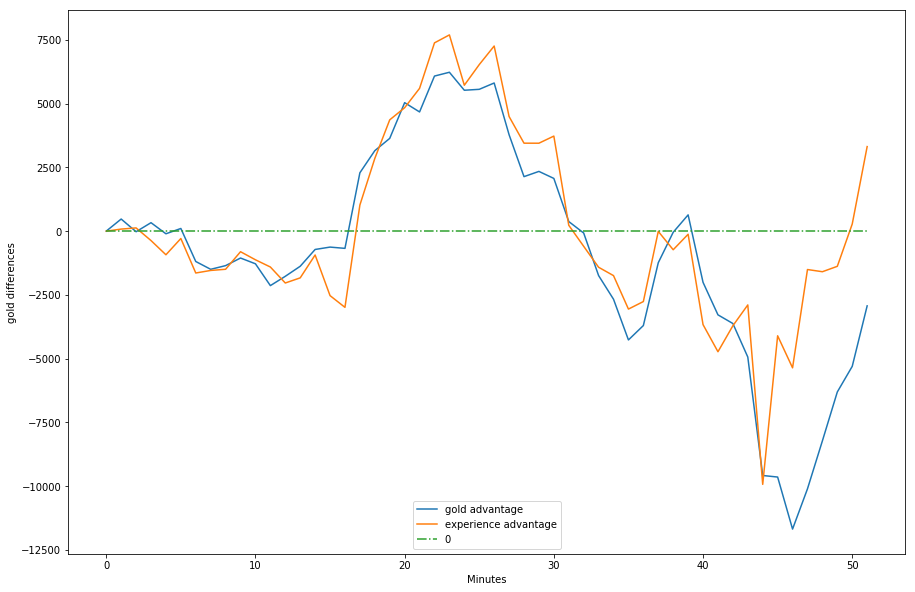

In [20]:
draw_trends_from_data(match_data_opendota).show()

** What an exciting game! ** 

The advantage changed from Dire to Radiant multiple times, and even at end of this game, the trend was dramatically changing. What really happened? 

Here, we will look at the real fights in this game, which is in the <font color = #BB2404> teamfights </font> field. In this field, you can get the information of start time, end time, number of deaths and performance of each player. Here I will combine the team fights with the plot above to make it more clear.

In [21]:
# in this function, we will add the fight time onto the previous plot
def add_fights_time(plt, match_data_opendota):
    plt = draw_trends_from_data(match_data_opendota)
    time1 = [fight['start'] / 60 for fight in match_data_opendota['teamfights']]
    time2 = [fight['end'] / 60 for fight in match_data_opendota['teamfights']]
    plt.scatter(time1,np.zeros(len(time2)), marker = 'x', c = 'red')
    plt.scatter(time2,np.zeros(len(time2)), marker = '*', c = 'purple')
    plt.legend(['gold advantage', 'experience advantage','0', 'fight start', 'fight end'], loc='lower center')
    return plt

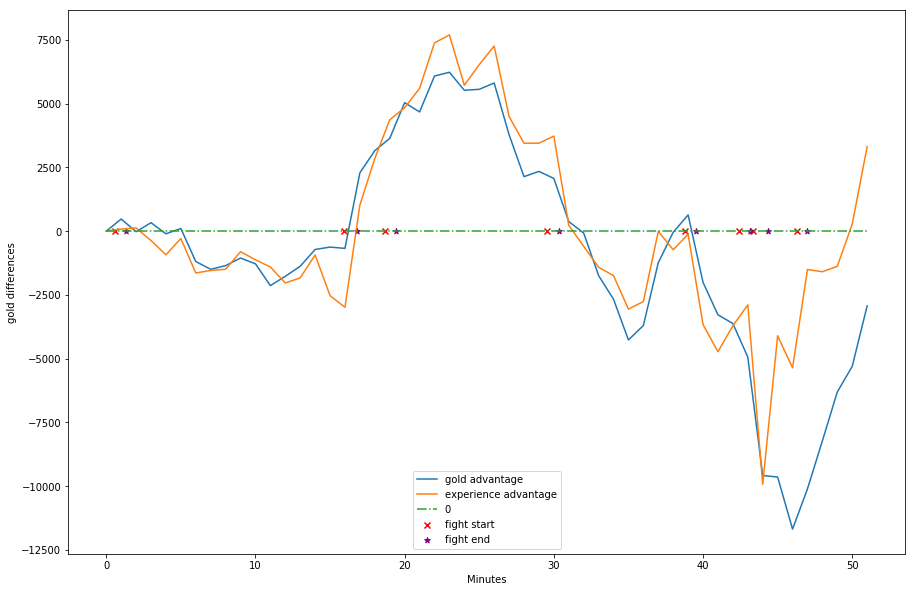

In [22]:
plt = add_fights_time(plt, match_data_opendota)
plt.show()

** Wow ~ ** Every time two teams fought, the gold and experience advantage would change dramatically. And the result of these fights ultimately decided the direction of this game.

## Part 3: Analysing Dota 2 data

If you like playing Dota 2, you may want to ask this kind of questions:

- Which hero was picked or baned most in this event?

- Which hero has highest winning rate?

- Can we predict the result just by the heroes each team chooses?

To answer these questions, we can do some analysis on the data we just obtained.

### Question 1: Which hero was picked or baned most in this event?

In [23]:
# here we will get the hero ban and pick times in 'picks_bans' field and store them in dicts
def get_most_pick_ban_hero(event_data):
    count_pick = {}
    count_ban = {}
    hero_dict = get_hero_dict()
    
    for data in event_data:
        if data['picks_bans'] != None:
            for pick_ban in data['picks_bans']:
                if pick_ban['is_pick']:
                    if pick_ban['hero_id'] in count_pick:
                        count_pick[pick_ban['hero_id']] += 1
                    else:
                        count_pick[pick_ban['hero_id']] = 1
                else:
                    if pick_ban['hero_id'] in count_ban:
                        count_ban[pick_ban['hero_id']] += 1
                    else:
                        count_ban[pick_ban['hero_id']] = 1
                    
    hero_id_pick = max(count_pick, key = count_pick.get)
    hero_name_pick = hero_dict[hero_id_pick]['localized_name']
    hero_id_ban = max(count_ban, key = count_ban.get)
    hero_name_ban = hero_dict[hero_id_ban]['localized_name']
    return hero_name_pick, hero_name_ban

In [24]:
hero_name_pick, hero_name_ban = get_most_pick_ban_hero(DAC_2018_data)
print('The hero that was baned most in DAC 2018: {0} '.format(hero_name_ban))
print('The hero that was picked most in DAC 2018: {0} '.format(hero_name_pick))

The hero that was baned most in DAC 2018: Omniknight 
The hero that was picked most in DAC 2018: Disruptor 


From the analysis above, we know that ** Omniknight ** is the hero that baned most in this event

And ** Disruptor ** is the hero that picked most.
![Failed to load pic](https://dotageeks.com/wp-content/uploads/2015/06/Disruptor-3.jpg "Dota 2")


### Question 2: Which hero has highest winning rate?

In [25]:
# we will store the win and lose numbers in a dict for each hero
def get_highest_winning_rate_hero(event_data):
    hero_dict = get_hero_dict()
    
    hero_win_lose_dict = {}
    # for convenience, we will initialize the dict to avoid emtpy checking afterwards
    for key in hero_dict.keys():
        hero_win_lose_dict[key] = {}
        hero_win_lose_dict[key]['win'] = 0
        hero_win_lose_dict[key]['lose'] = 0

    for data in event_data:
        if data['picks_bans'] != None:
            for pick_ban in data['picks_bans']:
                if pick_ban['is_pick']:
                    if data['radiant_win']:
                        if pick_ban['team'] == 0:
                            hero_win_lose_dict[pick_ban['hero_id']]['win'] += 1
                        else:
                            hero_win_lose_dict[pick_ban['hero_id']]['lose'] += 1
                    else:
                        if pick_ban['team'] == 0:
                            hero_win_lose_dict[pick_ban['hero_id']]['lose'] += 1
                        else:
                            hero_win_lose_dict[pick_ban['hero_id']]['win'] += 1
    highest_key = -1
    highest_rate = 0
                        
    for key, values in hero_win_lose_dict.items():
        # we will not count the hero that appeared less than 10 times in this event
        if values['lose'] + values['win'] < 10:
            continue
            
        if values['win'] / (values['lose'] + values['win']) > highest_rate:
            highest_rate = values['win'] / (values['lose'] + values['win'])
            highest_key = key
    return hero_dict[highest_key]['localized_name'], highest_rate     

In [26]:
hero_name, rate = get_highest_winning_rate_hero(DAC_2018_data)
print("Hero '{0}' has the highest winning rate: {1}".format(hero_name,rate))

Hero 'Keeper of the Light' has the highest winning rate: 0.75


### Question 3: Result prediction?

Actually, this is a very complicated question. But here I will only provide a very simple solution to you, hoping this will help you to come up with a better idea.

I am going to use scikit-learn logistic regression

In [27]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [28]:
# this function transforms the data into training format
def data_transform(match_data, hero_dict):
    hero_number = len(hero_dict.keys())
    
    zeros = np.zeros(hero_number)
    if match_data['picks_bans'] != None:
        for pick_ban in match_data['picks_bans']:
            if pick_ban['is_pick'] and pick_ban['hero_id'] < hero_number:
                if pick_ban['team'] == 0:
                    zeros[pick_ban['hero_id']] = 1
                else:
                    zeros[pick_ban['hero_id']] = -1
                    
    return zeros

In [29]:
# this function helps to pre-precess the data
def pre_process(event_data, hero_dict):
    
    training_data = DAC_2018_data[:300]
    validate_data = DAC_2018_data[300:]
    
    input_X = []
    input_y = []
        
    # this is for training data
    for data in training_data:
        data_transformed = data_transform(data, hero_dict)
        input_X.append(data_transformed)
        if data['radiant_win']:
            input_y.append(1)
        else:
            input_y.append(0)
        
    X = np.array(input_X)
    y = np.array(input_y)
    
    # this is for validation data
    valid_input_X = []
    valid_input_y = []
    for data in validate_data:
        data_transformed = data_transform(data, hero_dict)
        
        valid_input_X.append(data_transformed)
        if data['radiant_win']:
            valid_input_y.append(1)
        else:
            valid_input_y.append(0)  
    
    # remember to turn transform them into np arrays
    valid_X = np.array(valid_input_X)
    valid_y = np.array(valid_input_y)
    
    return X, y, valid_X, valid_y

In [30]:
# this function will create a logistic regression and train it on the X, y
def lr_train(X, y):
    lrModel = LogisticRegression()
    lrModel.fit(X, y)
    return lrModel

In [31]:
# initialize the model and calculate the accuracy on the validation set
hero_dict = get_hero_dict()
X, y, valid_X, valid_y = pre_process(DAC_2018_data, hero_dict)
lrmodel = lr_train(X, y)
y_pred = lrmodel.predict(valid_X)
accuracy = np.mean(valid_y == y_pred)
print('The accuracy for this model on the validation set is {}'.format(accuracy))

The accuracy for this model on the validation set is 0.5333333333333333


The accuracy here is quite low because I am only trying to give you some insights about how to start on this great problem :)

In Dota 2, sometimes the power of two heroes together is much larger than the sum of their power separately. Also on some occation, a hero is very afraid of another hero because of different hero abilities. These all should be considered, and there's still a long way to go.

## Conclusion

The goal for this tutorial is to give you a very basic idea of data analysis in this game. But I am also hoping that some of you who have never touched Dota 2 (or video games) before could have a chance to get to know this game.

** Dota 2 is fantastic, doing data analysis on Dota 2 is also fantastic! **

** Hope you find this tutorial helpful ！ **

![Failed to load pic](https://qph.fs.quoracdn.net/main-qimg-95ba9ab0bf41deed2e9d83ff78a5631a "Dota 2")
